In [333]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, roc_auc_score, plot_roc_curve,accuracy_score,plot_confusion_matrix,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier


# Can you predict whether a patient should be treated of his/her mental illness or not according to the values obtained in the dataset?

## Read data

In [334]:
survey=pd.read_csv('data/survey.csv')

In [335]:
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [336]:
survey.shape

(1259, 27)

In [337]:
survey['treatment'].value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

In [338]:
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [339]:
pd.options.display.max_columns=50 

## Data Cleaning

In [340]:
df=survey

In [341]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [343]:
df=df.drop(columns=['Timestamp','state','comments'])

In [344]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [345]:
df.isna().sum()

Age                            0
Gender                         0
Country                        0
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [346]:
df['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [347]:
df['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [348]:
df['self_employed'].isna().sum()

18

In [349]:
df['self_employed'] = df['self_employed'].fillna('No')

In [350]:
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [351]:
df['self_employed'].value_counts()

No     1113
Yes     146
Name: self_employed, dtype: int64

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1259 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             995 non-null    object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

In [353]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [354]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [355]:
df['work_interfere'].value_counts()

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

In [356]:
df['work_interfere'] = df['work_interfere'].fillna('Don\'t know')

In [357]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', "Don't know"],
      dtype=object)

In [358]:
df['work_interfere'].value_counts()

Sometimes     465
Don't know    264
Never         213
Rarely        173
Often         144
Name: work_interfere, dtype: int64

In [359]:
df['Gender']=df['Gender'].str.lower()

In [360]:
df['Gender']

0       female
1            m
2         male
3         male
4         male
         ...  
1254      male
1255      male
1256      male
1257         f
1258      male
Name: Gender, Length: 1259, dtype: object

In [361]:
male_names = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male",'a little about you', 'p']
trans_names = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_names = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

In [362]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,m,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [363]:
for i in male_names:
    df['Gender'][df['Gender']==i]='male'
    

<ipython-input-363-6fe7d7a4e114>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'][df['Gender']==i]='male'


In [364]:
for i in trans_names:
    df['Gender'][df['Gender']==i]='trans'


<ipython-input-364-73e63e245e3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'][df['Gender']==i]='trans'


In [365]:
for i in female_names:
    df['Gender'][df['Gender']==i]='female'

<ipython-input-365-aca35f149ce6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'][df['Gender']==i]='female'


In [366]:
df['Gender'].value_counts()

male      993
female    247
trans      19
Name: Gender, dtype: int64

In [367]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [368]:
df['Age'].value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          

In [369]:
df['Age'].replace({99999999999:31},inplace=True)

In [370]:
df['Age'].replace({-1726:31},inplace=True)

In [371]:
df['Age'].replace({-29:31},inplace=True)

In [372]:
df['Age'].replace({-1:31},inplace=True)

In [373]:
df['Age'].replace({8:31},inplace=True)

In [374]:
df['Age'].replace({5:31},inplace=True)

In [375]:
df['Age'].replace({11:31},inplace=True)

In [376]:
df['Age'].replace({329:31},inplace=True)

In [377]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


## Enviando o dataset limpo para visualização no tableau

In [378]:
#df.to_csv('data/survey_2014.csv')

## Transformação de variáveis categóricas em numéricas.

In [379]:
pd.options.display.max_columns=150 

In [380]:
df=pd.get_dummies(df,drop_first=True)

In [381]:
df

,Age,Gender_male,Gender_trans,Country_Austria,"Country_Bahamas, The",Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Canada,Country_China,Country_Colombia,Country_Costa Rica,Country_Croatia,Country_Czech Republic,Country_Denmark,Country_Finland,Country_France,Country_Georgia,Country_Germany,Country_Greece,Country_Hungary,Country_India,Country_Ireland,Country_Israel,Country_Italy,Country_Japan,Country_Latvia,Country_Mexico,Country_Moldova,Country_Netherlands,Country_New Zealand,Country_Nigeria,Country_Norway,Country_Philippines,Country_Poland,Country_Portugal,Country_Romania,Country_Russia,Country_Singapore,Country_Slovenia,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Zimbabwe,self_employed_Yes,family_history_Yes,treatment_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_100-500,no_employees_26-100,no_employees_500-1000,no_employees_6-25,no_employees_More than 1000,remote_work_Yes,tech_company_Yes,benefits_No,benefits_Yes,care_options_Not sure,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,anonymity_No,anonymity_Yes,leave_Somewhat difficult,leave_Somewhat easy,leave_Very difficult,leave_Very easy,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0
1,44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,32,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0
3,31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1
4,31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0
1255,32,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0
1256,34,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0
1257,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0


In [382]:
df.corr()['treatment_Yes'].sort_values(ascending=False)[1:20]

work_interfere_Sometimes         0.403994
family_history_Yes               0.377918
care_options_Yes                 0.273830
work_interfere_Often             0.250291
benefits_Yes                     0.208475
work_interfere_Rarely            0.159058
obs_consequence_Yes              0.156972
anonymity_Yes                    0.132933
mental_vs_physical_No            0.107255
leave_Very difficult             0.103273
mental_health_consequence_Yes    0.098846
Country_United States            0.097232
leave_Somewhat difficult         0.096607
seek_help_Yes                    0.085664
wellness_program_Yes             0.082927
mental_health_interview_No       0.075533
Age                              0.073165
Gender_trans                     0.070195
coworkers_Yes                    0.058717
Name: treatment_Yes, dtype: float64

## Definição de X e y:

In [383]:
X=df.drop(columns=['treatment_Yes'])

In [384]:
y=df['treatment_Yes']

In [385]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

## Normalização:

In [386]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [387]:
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

## Aplicação do Modelo de Regressão Logística

### Regressão logística com todas as colunas:

In [388]:
logistic=LogisticRegression()

In [389]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [390]:
logistic.score(X_train,y_train)

0.8547105561861521

In [391]:
logistic.score(X_test,y_test)

0.8333333333333334

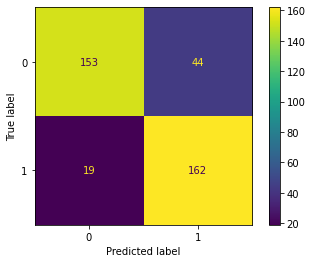

In [392]:
plot_confusion_matrix(logistic, X_test, y_test, values_format='.0f')

In [393]:
precision_score(y_test,logistic.predict(X_test))

0.7864077669902912

In [394]:
recall_score(y_test,logistic.predict(X_test))

0.8950276243093923

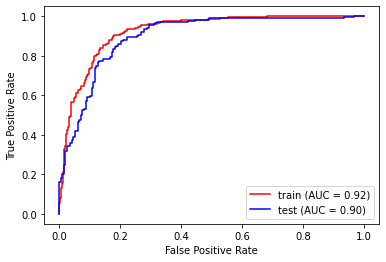

In [395]:
fig, ax = plt.subplots()

plot_roc_curve(logistic, X_train, y_train, color='red', ax= ax, name='train')
plot_roc_curve(logistic, X_test, y_test, color='blue', ax=ax, name='test')

### Regressão logística com as colunas mais importantes:

In [396]:
logistic.coef_

array([[ 0.13934976, -0.31066101, -0.00431245, -0.26404365,  0.        ,
         0.01929031, -0.18980579,  0.05858537,  0.076436  , -0.09047868,
        -0.16738005, -0.2641498 , -0.10726698,  0.15391404,  0.        ,
         0.16823251,  0.03267322, -0.01383869,  0.        , -0.0777893 ,
        -0.10181953, -0.21321607,  0.0280395 , -0.05358411, -0.36959576,
        -0.37794982,  0.        , -0.06748095, -0.12216496,  0.08536955,
        -0.09409969, -0.05461131, -0.08629713, -0.11008131,  0.        ,
         0.09893884, -0.1335691 ,  0.        , -0.26290559,  0.0198151 ,
         0.19962763,  0.07787493, -0.09420651, -0.15351571,  0.03099782,
        -0.1125176 ,  0.09399274, -0.12533241, -0.06965688,  0.09874773,
        -0.02211845,  0.37513934,  0.63146346,  1.7400208 ,  1.50767351,
         2.18431842,  0.03991416,  0.09735221,  0.02586089, -0.04829326,
        -0.02039447, -0.04346901, -0.19683915,  0.0495067 ,  0.33518881,
        -0.0520593 ,  0.26449139,  0.03686939, -0.0

In [397]:
coefs = pd.DataFrame(dict(zip(list([y for x in logistic.coef_ for y in x]),list(X.columns))),index=[0]).T.reset_index()

In [398]:
coefs

,index,0
0,0.139350,Age
1,-0.310661,Gender_male
2,-0.004312,Gender_trans
3,-0.264044,Country_Austria
4,0.000000,Country_Romania
...,...,...
82,0.021256,phys_health_interview_No
83,0.211402,phys_health_interview_Yes
84,0.058452,mental_vs_physical_No
85,0.075719,mental_vs_physical_Yes


In [399]:
coefs.columns=['coeficiente','nome_da_coluna']

In [400]:
coefs[['coeficiente','nome_da_coluna']].sort_values(by='coeficiente',ascending=False).head(20)

,coeficiente,nome_da_coluna
50,2.184318,work_interfere_Sometimes
48,1.740021,work_interfere_Often
49,1.507674,work_interfere_Rarely
47,0.631463,work_interfere_Never
77,0.378235,coworkers_Yes
46,0.375139,family_history_Yes
59,0.335189,benefits_Yes
67,0.271246,anonymity_Yes
61,0.264491,care_options_Yes
83,0.211402,phys_health_interview_Yes


In [401]:
X1=df[['work_interfere_Often','work_interfere_Sometimes','work_interfere_Rarely','coworkers_Yes','family_history_Yes','work_interfere_Never','care_options_Yes','anonymity_Yes', 'phys_health_interview_Yes','obs_consequence_Yes','leave_Very difficult','mental_health_interview_Yes','benefits_Yes','seek_help_Yes','Gender_male','Gender_trans','care_options_Not sure','mental_health_consequence_No']]

In [402]:
y1=df['treatment_Yes']

In [403]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3)

In [404]:
scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)

In [405]:
scaler = StandardScaler()
scaler.fit(X_test1)
X_test1 = scaler.transform(X_test1)

In [406]:
logistic1=LogisticRegression()

In [407]:
logistic1.fit(X_train1,y_train1)

LogisticRegression()

In [408]:
logistic1.score(X_train1,y_train1)

0.8342792281498297

In [409]:
logistic1.score(X_test1,y_test1)

0.8359788359788359

In [410]:
precision_score(y_test1,logistic1.predict(X_test1))

0.8064516129032258

In [411]:
recall_score(y_test1,logistic1.predict(X_test1))

0.8974358974358975

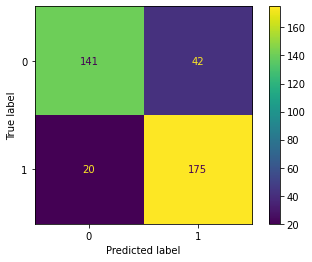

In [412]:
plot_confusion_matrix(logistic1, X_test1, y_test1, values_format='.0f')

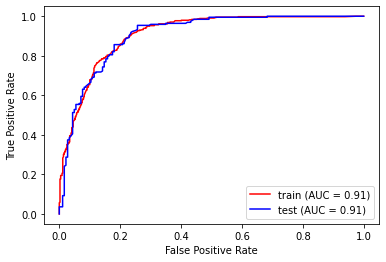

In [413]:
fig, ax = plt.subplots()

plot_roc_curve(logistic1, X_train1, y_train1, color='red', ax= ax, name='train')
plot_roc_curve(logistic1, X_test1, y_test1, color='blue', ax=ax, name='test')

## Aplicação do método LGBM:

In [414]:
lgbm = LGBMClassifier(max_depth=3, n_estimators=70)

### Aplicação LGBM com todas as colunas:

In [415]:
X.columns=['Age', 'Gender_male', 'Gender_trans', 'Country_Austria',
       'Country_Bahamas', 'Country_Belgium',
       'Country_Bosnia and Herzegovina', 'Country_Brazil', 'Country_Bulgaria',
       'Country_Canada', 'Country_China', 'Country_Colombia',
       'Country_Costa Rica', 'Country_Croatia', 'Country_Czech Republic',
       'Country_Denmark', 'Country_Finland', 'Country_France',
       'Country_Georgia', 'Country_Germany', 'Country_Greece',
       'Country_Hungary', 'Country_India', 'Country_Ireland', 'Country_Israel',
       'Country_Italy', 'Country_Japan', 'Country_Latvia', 'Country_Mexico',
       'Country_Moldova', 'Country_Netherlands', 'Country_New Zealand',
       'Country_Nigeria', 'Country_Norway', 'Country_Philippines',
       'Country_Poland', 'Country_Portugal', 'Country_Romania',
       'Country_Russia', 'Country_Singapore', 'Country_Slovenia',
       'Country_South Africa', 'Country_Spain', 'Country_Sweden',
       'Country_Switzerland', 'Country_Thailand', 'Country_United Kingdom',
       'Country_United States', 'Country_Uruguay', 'Country_Zimbabwe',
       'self_employed_Yes', 'family_history_Yes', 'work_interfere_Never',
       'work_interfere_Often', 'work_interfere_Rarely',
       'work_interfere_Sometimes', 'no_employees_100-500',
       'no_employees_26-100', 'no_employees_500-1000', 'no_employees_6-25',
       'no_employees_More than 1000', 'remote_work_Yes', 'tech_company_Yes',
       'benefits_No', 'benefits_Yes', 'care_options_Not sure',
       'care_options_Yes', 'wellness_program_No', 'wellness_program_Yes',
       'seek_help_No', 'seek_help_Yes', 'anonymity_No', 'anonymity_Yes',
       'leave_Somewhat difficult', 'leave_Somewhat easy',
       'leave_Very difficult', 'leave_Very easy',
       'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'phys_health_consequence_No', 'phys_health_consequence_Yes',
       'coworkers_Some of them', 'coworkers_Yes', 'supervisor_Some of them',
       'supervisor_Yes', 'mental_health_interview_No',
       'mental_health_interview_Yes', 'phys_health_interview_No',
       'phys_health_interview_Yes', 'mental_vs_physical_No',
       'mental_vs_physical_Yes', 'obs_consequence_Yes']

In [416]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 92 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age                             1259 non-null   int64
 1   Gender_male                     1259 non-null   uint8
 2   Gender_trans                    1259 non-null   uint8
 3   Country_Austria                 1259 non-null   uint8
 4   Country_Bahamas                 1259 non-null   uint8
 5   Country_Belgium                 1259 non-null   uint8
 6   Country_Bosnia and Herzegovina  1259 non-null   uint8
 7   Country_Brazil                  1259 non-null   uint8
 8   Country_Bulgaria                1259 non-null   uint8
 9   Country_Canada                  1259 non-null   uint8
 10  Country_China                   1259 non-null   uint8
 11  Country_Colombia                1259 non-null   uint8
 12  Country_Costa Rica              1259 non-null   uint8
 13  Cou

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1)

In [418]:
lgbm.fit(X_train,y_train)

LGBMClassifier(max_depth=3, n_estimators=70)

In [419]:
lgbm.score(X_train,y_train)

0.8596646072374228

In [420]:
lgbm.score(X_test,y_test)

0.8571428571428571

In [421]:
precision_score(y_test,lgbm.predict(X_test))

0.8108108108108109

In [422]:
recall_score(y_test,lgbm.predict(X_test))

0.9375

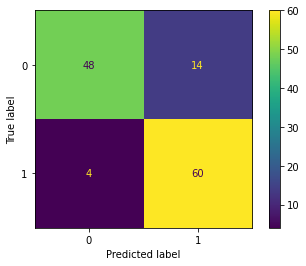

In [423]:
plot_confusion_matrix(lgbm, X_test, y_test, values_format='.0f')

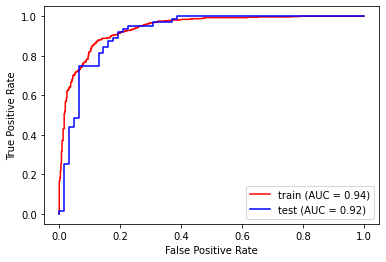

In [424]:
fig, ax = plt.subplots()

plot_roc_curve(lgbm, X_train, y_train, color='red', ax= ax, name='train')
plot_roc_curve(lgbm, X_test, y_test, color='blue', ax=ax, name='test')

### Aplicação de LGBM com as colunas mais importantes:

In [425]:
lgbm.feature_importances_

array([46, 16,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 13, 11,  0,  0,  6,
       28, 16, 35, 36, 50,  4,  3,  2,  2,  3,  4,  2,  2, 25,  8, 19,  1,
        6,  4,  0,  0, 18, 10,  6,  3,  1, 11,  8,  6,  0,  6,  9,  5,  7,
        4,  1,  3,  4,  0,  0,  1], dtype=int32)

In [426]:
coef_by_columns=pd.Series(dict(zip(X.columns,lgbm.feature_importances_))).sort_values(ascending=False)
coef_by_columns.head(20)

work_interfere_Sometimes         50
Age                              46
work_interfere_Rarely            36
work_interfere_Often             35
family_history_Yes               28
benefits_Yes                     25
care_options_Yes                 19
anonymity_Yes                    18
work_interfere_Never             16
Gender_male                      16
Country_United Kingdom           13
mental_health_consequence_No     11
Country_United States            11
leave_Somewhat difficult         10
coworkers_Yes                     9
care_options_Not sure             8
mental_health_consequence_Yes     8
supervisor_Yes                    7
wellness_program_Yes              6
self_employed_Yes                 6
dtype: int64

In [427]:
X2=df[['work_interfere_Sometimes','Age','work_interfere_Often','work_interfere_Rarely','benefits_Yes','family_history_Yes','Gender_male','Country_United States','work_interfere_Never','care_options_Yes','coworkers_Yes','Country_United Kingdom','leave_Somewhat difficult','anonymity_Yes','coworkers_Some of them']]


In [428]:
y2=df['treatment_Yes']

In [429]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,test_size=0.1)

In [430]:
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2 = scaler.transform(X_train2)

In [431]:
scaler = StandardScaler()
scaler.fit(X_test2)
X_test2 = scaler.transform(X_test2)

In [432]:
lgbm.fit(X_train2,y_train2)

LGBMClassifier(max_depth=3, n_estimators=70)

In [433]:
lgbm.score(X_train2,y_train2)

0.853486319505737

In [434]:
lgbm.score(X_test2,y_test2)

0.8492063492063492

In [435]:
precision_score(y_test2,lgbm.predict(X_test2))

0.7857142857142857

In [436]:
recall_score(y_test2,lgbm.predict(X_test2))

0.9322033898305084

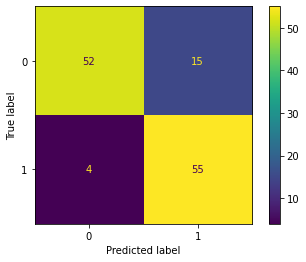

In [437]:
plot_confusion_matrix(lgbm, X_test2, y_test2, values_format='.0f')

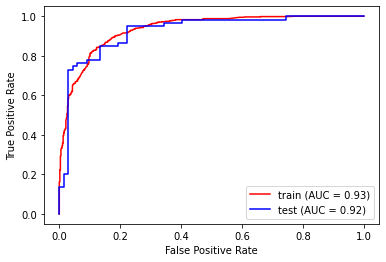

In [438]:
fig, ax = plt.subplots()

plot_roc_curve(lgbm, X_train2, y_train2, color='red', ax= ax, name='train')
plot_roc_curve(lgbm, X_test2, y_test2, color='blue', ax=ax, name='test')

## Learning curve : relação entre o tamanho do teste e sua acurácia

In [439]:
#train_sizes

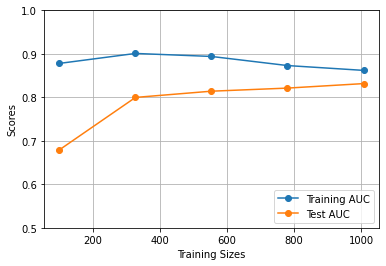

In [440]:
from sklearn.model_selection import learning_curve

curve = learning_curve(lgbm, X, y, scoring='accuracy')

train_sizes = curve[0]
train_scores = curve[1]
test_scores = curve[2]

plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Test AUC')
plt.ylim([0.5, 1])
plt.xlabel('Training Sizes')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.grid()

## Outra forma de teste: cross_validate

In [441]:
from sklearn.model_selection import cross_val_score, cross_validate,KFold

In [442]:
cross_validate(lgbm, X, y, cv=KFold(n_splits=10), scoring='accuracy', return_train_score=True, n_jobs=-1)

{'fit_time': array([0.15943289, 0.1821301 , 0.17841172, 0.19439793, 0.06493592,
        0.08332014, 0.0696032 , 0.06894588, 0.06491399, 0.04319715]),
 'score_time': array([0.00713396, 0.03970885, 0.01104522, 0.03078508, 0.00698686,
        0.00951195, 0.01173091, 0.00803304, 0.00728798, 0.00471091]),
 'test_score': array([0.82539683, 0.83333333, 0.82539683, 0.86507937, 0.80952381,
        0.85714286, 0.82539683, 0.83333333, 0.84126984, 0.824     ]),
 'train_score': array([0.86407767, 0.86231244, 0.85613416, 0.85878199, 0.85436893,
        0.85701677, 0.85878199, 0.85701677, 0.85878199, 0.8633157 ])}